# Data Preprocessing

Import Libraries


In [27]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

Function to Visualise Confusion Matrix

In [28]:
def visualiseConfusionMatrix(cnf_mat, header):
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_labels = ['DF', 'F2F', 'FS', 'NT']
    sns.heatmap(cnf_mat, annot=True, cmap='Greens', fmt='d', annot_kws={"size": 20, "weight": "bold"}, xticklabels=class_labels, yticklabels=class_labels, linewidths=.05, linecolor="black")
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    for i in range(4):
        for j in range(4):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="black"))

    plt.title(header)
    name = 'HOG_' + header + '.png'
    plt.savefig(name)
    files.download(name)

    plt.show()

Load the Dataset

In [29]:
dataset = pd.read_csv('/content/drive/MyDrive/Project/CSVs/Features_hog.csv')
X = dataset.iloc[ : , 2 : ].values
y = dataset.iloc[ : , 0 ].values
print(X)
print(y)

[[0.13151719 0.07062256 0.09944781 ... 0.00222549 0.00553888 0.01158777]
 [0.13184087 0.07120779 0.09940246 ... 0.00186195 0.00496811 0.01130171]
 [0.13314608 0.07112867 0.09793073 ... 0.00228579 0.0057272  0.01090482]
 ...
 [0.10796575 0.08958595 0.09295841 ... 0.07102732 0.06181851 0.17945974]
 [0.10696629 0.08877103 0.09296877 ... 0.07393706 0.06056442 0.18213604]
 [0.11520288 0.08459474 0.09039539 ... 0.070232   0.07304857 0.17970096]]
['Deepfakes' 'Deepfakes' 'Deepfakes' ... 'NeuralTextures' 'NeuralTextures'
 'NeuralTextures']


Split the dataset into training set and test set.

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

Initialise the 5-Fold Cross Validation

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Support Vector Machine

Predict on Test Set.

In [32]:
poly_accuracy, rbf_accuracy = 0, 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly = svm.SVC(kernel='poly', degree=8, C=1).fit(X_train, y_train)
    rbf = svm.SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)
    
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    
    poly_accuracy += accuracy_score(y_test, poly_pred)
    rbf_accuracy += accuracy_score(y_test, rbf_pred)


Outcomes.

Accuracy (Polynomial Kernel):  98.56 %
Accuracy (RBF Kernel):  73.80 %
F1 score (Polynomial Kernel):  97.18
F1 score (RBF Kernel):  74.01
Confusion Matrix (Polynomial Kernel): 
 [[69  0  2  0]
 [ 0 73  1  3]
 [ 1  0 78  0]
 [ 0  2  0 90]]
Confusion Matrix (RBF Kernel): 
 [[57  3 11  0]
 [ 2 57  6 12]
 [12  3 62  2]
 [ 1 26  5 60]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

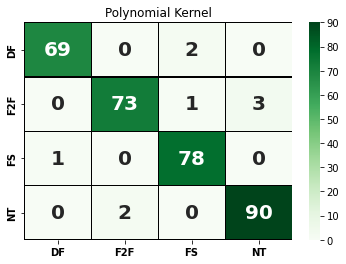

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

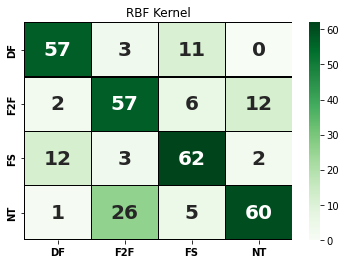

In [33]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy/5*100) + " %")
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy/5*100) + " %")

poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('F1 score (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('F1 score (RBF Kernel): ', "%.2f" % (rbf_f1*100))

print('Confusion Matrix (Polynomial Kernel): \n', confusion_matrix(y_test, poly_pred))
print('Confusion Matrix (RBF Kernel): \n',confusion_matrix(y_test, rbf_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, poly_pred), 'Polynomial Kernel')
print()
visualiseConfusionMatrix(confusion_matrix(y_test, rbf_pred), 'RBF Kernel')


# Random Forest

Importing Libraries

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Define the Classifier

In [35]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)

Predicting Test Set Results

In [36]:
rf_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    rf_accuracy += accuracy_score(y_test, y_pred)
    

Outcomes

Accuracy (Random Forest):  95.56 %
F1 (Random Forest):  94.99
Confustion Matrix (Random Forest):
 [[69  0  2  0]
 [ 0 69  4  4]
 [ 0  1 77  1]
 [ 0  2  2 88]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

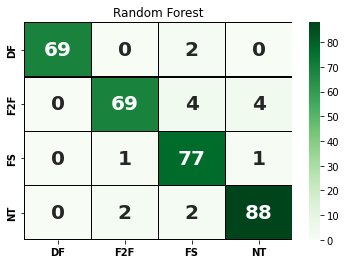

In [37]:
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy/5*100) + " %")
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))
print("Confustion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Random Forest')

# MultiClass Logistic Regression

Import Libraries

In [38]:
from sklearn.linear_model import LogisticRegression

Define Classifier.

In [39]:
classifier = LogisticRegression(multi_class='auto', solver='sag')


Predicting Test Set Results.

In [40]:
lr_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    lr_accuracy += accuracy_score(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Outcomes

Accuracy (Logistic Regression):  68.48 %
F1 (Logistic Regression):  69.25
Confusion Matrix (Logistic Regression):
 [[55  7  8  1]
 [ 5 50  7 15]
 [12  3 56  8]
 [ 2 19 11 60]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

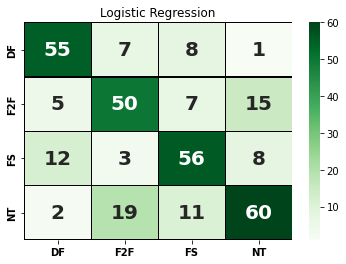

In [41]:
lr_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Logistic Regression): ', "%.2f" % (lr_accuracy/5*100) + " %")
print('F1 (Logistic Regression): ', "%.2f" % (lr_f1*100))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Logistic Regression')

# Decision Tree

Importing Libraries

In [42]:
from sklearn.tree import DecisionTreeClassifier

Define the Classifier

In [43]:
clf = DecisionTreeClassifier()

Predicting Test Set Results

In [44]:
dt_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    dt_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (Decision Tree):  71.30 %
F1 (Decision Tree):  72.09
Confustion Matrix (Decision Tree):
 [[55  3 11  2]
 [ 4 51  5 17]
 [12  4 58  5]
 [ 3 19  4 66]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

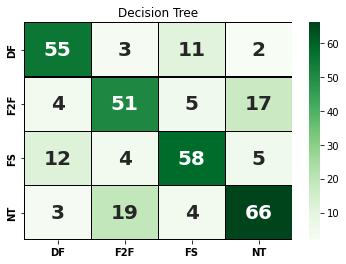

In [45]:
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Decision Tree): ', "%.2f" % (dt_accuracy/5*100) + " %")
print('F1 (Decision Tree): ', "%.2f" % (dt_f1*100))
print("Confustion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Decision Tree')

# KNN

Importing Libraries

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Define the Classifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=10)

Predicting Test Set Results

In [48]:
knn_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    knn_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (KNN):  61.48 %
F1 (KNN):  59.84
Confustion Matrix (KNN):
 [[57  6  8  0]
 [ 7 54  3 13]
 [27  6 46  0]
 [10 42  4 36]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

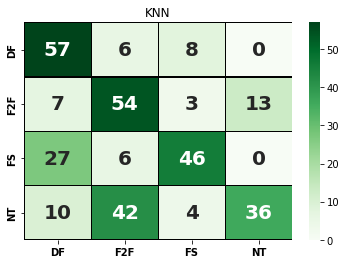

In [49]:
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (KNN): ', "%.2f" % (knn_accuracy/5*100) + " %")
print('F1 (KNN): ', "%.2f" % (knn_f1*100))
print("Confustion Matrix (KNN):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'KNN')